## 6) 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

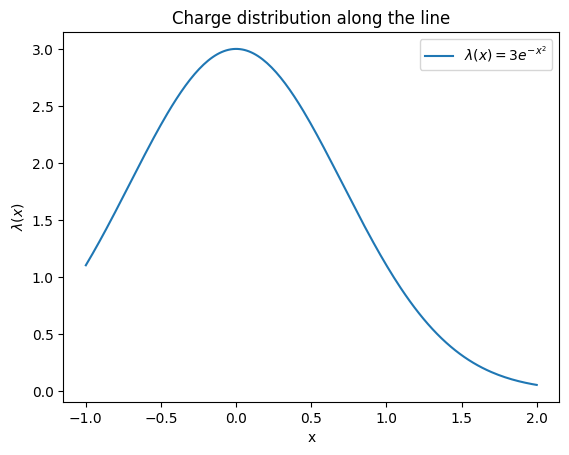

In [ ]:
## 1) 
x = np.linspace(-1, 2, 200)
lam_bda = 3*np.exp(-x**2)

plt.plot(x, lam_bda, label=r'$\lambda(x)=3e^{-x^2}$')
plt.xlabel("x")
plt.ylabel(r"$\lambda(x)$")
plt.title("Charge distribution along the line")
plt.legend()
plt.show()


In [7]:
## 2)

x = sp.symbols('x')
lam = 3*sp.exp(-x**2)
Q_sym = sp.integrate(lam, (x, -1, 2))
Q_sym

3*sqrt(pi)*erf(1)/2 + 3*sqrt(pi)*erf(2)/2

Sympy returns a err function, it is because $e^{-x^2}$ has no antiderivate. The result is analytic. 

In [15]:
## 3)
def lam(x):
    return 3 * np.exp(-x**2)

a, b = -1, 2
n = 10                         
h = (b - a) / n                

Q_trap_10 =0.0
for i in range(1, n):        
    x_i = a + i*h
    Q_trap_10 += 2 * lam(x_i)

Q_trap_10+= lam(a) + lam(b)      
Q_trap_10*= (h / 2)

print("Trapezoidal rule (n=10) result:", Q_trap_10)


Trapezoidal rule (n=10) result: 4.8684889045431685


In [ ]:
## 4) 
def lam(x):
    return 3 * np.exp(-x**2)

a, b = -1, 2
n = 100                        
h = (b - a) / n               

Q_trap_100 = 0.0
for i in range(1, n):        
    x_i = a + i*h
    Q_trap_100 += 2 * lam(x_i)

Q_trap_100 += lam(a) + lam(b) 
Q_trap_100 *= (h / 2)

print("Trapezoidal rule (n=100 result:", Q_trap_100)


Trapezoidal rule (n=100 result: 4.886534538407494


In [ ]:
## 5) 
def lam(x):
    return 3 * np.exp(-x**2)

a, b = -1, 2
n = 10                          
h = (b - a) / n                

Q_simp_10 = lam(a) + lam(b)

for i in range(1, n, 2):         
    x_i = a + i*h
    Q_simp_10 += 4 * lam(x_i)

for i in range(2, n, 2):         
    x_i = a + i*h
    Q_simp_10 += 2* lam(x_i)

Q_simp_10 *= (h / 3)

print("Simpson's rule (n=10) result:", Q_simp_10)


Simpson's rule (n=10) result: 4.88680957152326


In [ ]:
## 6) 
def lam(x):
    return 3 * np.exp(-x**2)

a, b = -1, 2
n = 100                        
h = (b - a) / n                

Q_simp_100 = lam(a) + lam(b)

for i in range(1, n, 2):         
    x_i = a + i*h
    Q_simp_100 += 4 * lam(x_i)

for i in range(2, n, 2):        
    x_i = a + i*h
    Q_simp_100 += 2 * lam(x_i)

Q_simp_100 *= (h / 3)

print("Simpson's rule (n=100) results:", Q_simp_100)


Simpson's rule (n=100) results: 4.886716580694897


In [13]:
## 7) 
from scipy.integrate import quad

def lam(x):
    return 3 * np.exp(-x**2)

a, b = -1, 2

Q_quad, err = quad(lam, a, b)

print("scipy quad result:", Q_quad)
print("estimated error:", err)


scipy quad result: 4.886716570724547
estimated error: 4.014028567897086e-10


In [29]:
# table
print(f"{'Method':<22}{'Result':<20}{'Abs Error vs quad'}")
print("-"*60)
print(f"{'Trapezoidal (n=10)':<22}{Q_trap_10:<20.10f}{abs(Q_trap_10-Q_quad):.2e}")
print(f"{'Trapezoidal (n=100)':<22}{Q_trap_100:<20.10f}{abs(Q_trap_100-Q_quad):.2e}")
print(f"{'Simpson (n=10)':<22}{Q_simp_10:<20.10f}{abs(Q_simp_10-Q_quad):.2e}")
print(f"{'Simpson (n=100)':<22}{Q_simp_100:<20.10f}{abs(Q_simp_100-Q_quad):.2e}")
print(f"{'scipy quad':<22}{Q_quad:<20.10f}{'~'+str(err):>}")

Method                Result              Abs Error vs quad
------------------------------------------------------------
Trapezoidal (n=10)    4.8684889045        1.82e-02
Trapezoidal (n=100)   4.8865345384        1.82e-04
Simpson (n=10)        4.8868095715        9.30e-05
Simpson (n=100)       4.8867165807        9.97e-09
scipy quad            4.8867165707        ~4.014028567897086e-10


The trapezoidal rule converges slowly; even with 100 steps it is close but not exact. Simpson’s rule is far more accurate: with just 10 steps it nearly matches quad. With 100 steps, Simpson’s rule gives the same result as quad to many decimals. This shows Simpson’s rule has much faster convergence for smooth functions like Gaussians.

## 8)
The trapezoidal rule estimates the area under a curve by connecting points with straight lines and summing the resulting trapezoids. Simpson’s rule is more accurate because it uses parabolas to approximate the curve over pairs of intervals, which captures the curve’s shape better. Gaussian quadrature, like what quad uses, works differently: it carefully chooses the points and weights to give a very accurate integral, even with fewer points, and does not require equally spaced intervals. Overall, trapezoidal is simplest, Simpson’s is faster and more accurate for smooth functions, and Gaussian quadrature is the most precise method.